# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import datetime
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Today's date
now = datetime.datetime.now()

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [52]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# List to hold results
weather_list = []

# Variables to keep track of data processing
record = 1
set = 1

# Splits "cities" list into sets of 12 
buffer = 12
set_count = int(len(cities) / buffer)


print("Beginning Data Retrieval")
print("-----------------------------")

# Build query URL
for city in cities:
    try:
        query_url = url + "appid=" + api_key + "&q=" + city
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        weather_list.append({"City": weather_json['name'],
            "Cloudiness": weather_json['clouds']['all'],
            "Country": weather_json['sys']['country'],
            "Date": weather_json['dt'],
            "Humidity": weather_json['main']['humidity'],
            "Lat": weather_json['coord']['lat'],
            "Lng": weather_json['coord']['lon'],
            "Max Temp": weather_json['main']['temp_max'] * 9/5 - 459.67, #Converts from Kelvins to Fahrenheit
            "Wind Speed": weather_json['wind']['speed']})
        print(f"Processing Record {record} of Set {set} | {weather_json['name']}")
        # Using 2 if statements to sort of cheat a way to split sets instead of using modulo
        record += 1
        if record == set_count:
            record = 1
            set += 1
    except:
        print("City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Hermanus
Processing Record 2 of Set 1 | Sobolevo
Processing Record 3 of Set 1 | Rikitea
Processing Record 4 of Set 1 | George
Processing Record 5 of Set 1 | Kapaa
Processing Record 6 of Set 1 | East London
Processing Record 7 of Set 1 | Quatre Cocos
Processing Record 8 of Set 1 | Aksarka
Processing Record 9 of Set 1 | Ulaanbaatar
Processing Record 10 of Set 1 | Bredasdorp
City not found. Skipping...
Processing Record 11 of Set 1 | Albany
Processing Record 12 of Set 1 | Riyadh
Processing Record 13 of Set 1 | Mataura
Processing Record 14 of Set 1 | San Quintin
Processing Record 15 of Set 1 | Mahebourg
Processing Record 16 of Set 1 | Punta Arenas
Processing Record 17 of Set 1 | Tiksi
Processing Record 18 of Set 1 | Ribeira Grande
Processing Record 19 of Set 1 | Batticaloa
Processing Record 20 of Set 1 | Northam
Processing Record 21 of Set 1 | Ushuaia
Processing Record 22 of Set 1 | Grand Gaube
Processing

Processing Record 42 of Set 4 | Lagoa
Processing Record 43 of Set 4 | Makakilo City
Processing Record 44 of Set 4 | Avera
Processing Record 45 of Set 4 | Comodoro Rivadavia
Processing Record 46 of Set 4 | Bavleny
City not found. Skipping...
Processing Record 47 of Set 4 | Husyatyn
Processing Record 48 of Set 4 | Tessalit
Processing Record 49 of Set 4 | Knysna
Processing Record 1 of Set 5 | Manicore
Processing Record 2 of Set 5 | Palmerston
Processing Record 3 of Set 5 | Deniliquin
Processing Record 4 of Set 5 | Bang Saphan
Processing Record 5 of Set 5 | Port Blair
Processing Record 6 of Set 5 | Pokhara
Processing Record 7 of Set 5 | Adrar
Processing Record 8 of Set 5 | Hue
City not found. Skipping...
Processing Record 9 of Set 5 | Lyaskelya
Processing Record 10 of Set 5 | Olkhovka
Processing Record 11 of Set 5 | Chiredzi
Processing Record 12 of Set 5 | Jabinyanah
Processing Record 13 of Set 5 | Oskarshamn
Processing Record 14 of Set 5 | Port Shepstone
City not found. Skipping...
City n

Processing Record 34 of Set 8 | Iroquois Falls
Processing Record 35 of Set 8 | Tongliao
Processing Record 36 of Set 8 | Boa Vista
Processing Record 37 of Set 8 | Los Llanos de Aridane
Processing Record 38 of Set 8 | Mujiayingzi
Processing Record 39 of Set 8 | Linden
Processing Record 40 of Set 8 | Arcachon
Processing Record 41 of Set 8 | Faya
Processing Record 42 of Set 8 | Amahai
Processing Record 43 of Set 8 | Chuy
Processing Record 44 of Set 8 | Mount Gambier
Processing Record 45 of Set 8 | San Patricio
Processing Record 46 of Set 8 | Khasan
Processing Record 47 of Set 8 | Bilibino
Processing Record 48 of Set 8 | Saint-Augustin
Processing Record 49 of Set 8 | Sola
Processing Record 1 of Set 9 | Conceicao do Araguaia
Processing Record 2 of Set 9 | Sangar
Processing Record 3 of Set 9 | Anchorage
Processing Record 4 of Set 9 | Bellingham
Processing Record 5 of Set 9 | Moree
Processing Record 6 of Set 9 | Talnakh
Processing Record 7 of Set 9 | Ozinki
Processing Record 8 of Set 9 | Pochu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [61]:
weather_df = pd.DataFrame(weather_list)
weather_df.to_csv("Weather_df.csv")
weather_df.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

In [60]:
weather_df.head()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

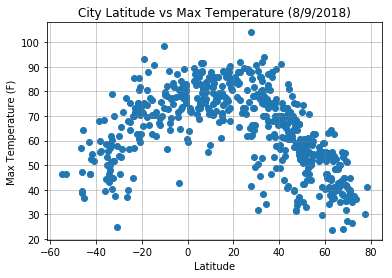

In [69]:
lat_temp = plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker="o")
plt.grid(color="grey", alpha=0.5)
lat_temp
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({now.day}/{now.month}/{now.year})")
plt.savefig("lat_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

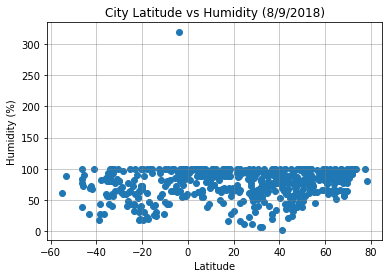

In [71]:
lat_hum = plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker="o")
plt.grid(color="grey", alpha=0.5)
lat_temp
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({now.day}/{now.month}/{now.year})")
plt.savefig("lat_hum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

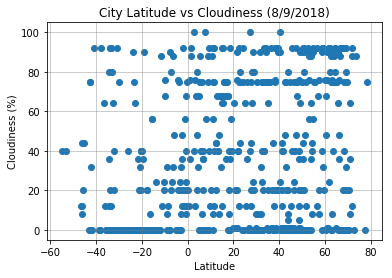

In [72]:
lat_clo = plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker="o")
plt.grid(color="grey", alpha=0.5)
lat_temp
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({now.day}/{now.month}/{now.year})")
plt.savefig("lat_cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

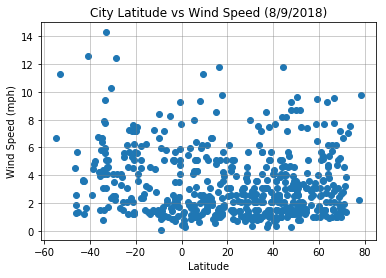

In [73]:
lat_win = plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker="o")
plt.grid(color="grey", alpha=0.5)
lat_temp
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({now.day}/{now.month}/{now.year})")
plt.savefig("lat_wind.png")
plt.show()